**Alumno:**
- Miriam Garcia Lagos

In [1]:
from numpy import *
from math import *
from pylab import *
import matplotlib.pyplot as plt

1. **Corriente alterna**

Una corriente alterna está descrito por $$ i(t) = i_0 \left(sin\frac{π t}{t_0}
 - β sin\frac{2 \pi t}{t_0} \right) $$

donde $i_0 = 1$ A, $t_0 = 0.05$ seg, y $\beta = 0.2$. Obtén númericamente la corriente cuadrática media, definida como $$ i_{rms} = \sqrt{\frac{1}{t_0} \int_{0}^{t_0} i^2 (t) dt} $$

Resuelve por el método que prefieras. Defiende el método que usas. Deteremina el error de tu resultado para distintas $N$.

*Solución:*

In [2]:
# Primero definimos las constantes:
i0 = 1
t0 = 0.05
beta = 0.2
d = 1/t0

#Ahora definimos la función i(t), que será la función a integrar
def i(t):
  return (i0*(sin((pi*t)/t0) - beta*sin((2*pi*t)/t0) ))**2


#Vamos a usar el método del trapecio, así que ahora lo escribimos
def trapecio(f,a,b,N):
  h = abs(b-a)/N
  I=0.5*f(a)+0.5*f(b)
  for k in range(1,N):
    I += f(a+k*h)
  return h*I

##################

In [3]:
# Ahora definimos nuestro resultado para diferentes N
ir0 = trapecio(i,0,t0,4) #N=4
ir1 = trapecio(i,0,t0,100) #N=100
ir2 = trapecio(i,0,t0,1000) #N=1000
ir3 = trapecio(i,0,t0,10000) #N=10000

#Ahora multiplicamos por 1/t0 y sacamos su raiz
i_rsm0 = sqrt(d*ir0)
i_rsm1 = sqrt(d*ir1)
i_rsm2 = sqrt(d*ir2)
i_rsm3 = sqrt(d*ir3)

#Ahora mostramos nuestros resultados para i_rms:
print('Para N=4, el resultado para i_rms es: ', i_rsm0)
print('Para N=100, el resultado para i_rms es: ', i_rsm1)
print('Para N=1000, el resultado para i_rms es: ', i_rsm2)
print('Para N=10000, el resultado de i_rms es: ', i_rsm3)

Para N=4, el resultado para i_rms es:  0.7211102550927979
Para N=100, el resultado para i_rms es:  0.7211102550927979
Para N=1000, el resultado para i_rms es:  0.7211102550927979
Para N=10000, el resultado de i_rms es:  0.7211102550927982


Ahora determinamos el error para nuestros resultados, este estará dado por: $$ ϵ = \frac{1}{12} h^2 [f'(a) - f'(b)] $$

Donde $h$ es el espacio entre los puntos adyacentes, tal que, $h = \frac{b-a}{N} = \frac{0.05}{N} $, pues nuestos limites de integración son $a=0$ y $b=t_0=0.05$

In [4]:
#Definimos la derivada de i(t)^2 usando regla de la cadena, pues es la función que integramos:

def di(t):
  return 2*((pi/t0)*cos((pi*t)/t0) - beta*((2*pi)/t0)*cos((2*pi*t)/t0))*(sin((pi*t)/t0) - beta*sin((2*pi*t)/t0) )

#Definimos f'(a)-f'(b)
a_b = di(0) - di(0.05)

#Definimos los diferentes valores de h, para las diferentes N y la elevamos al cuadrado
h4 = (0.05/4)**2
h100=(0.05/100)**2
h1000=(0.05/1000)**2
h10000=(0.05/10000)**2

#Con a=0 y b=0.05
e4 = (1/12)*(h4)*a_b
e100 = (1/12)*h100*a_b
e1000 = (1/12)*h1000*a_b
e10000 = (1/12)*h10000*a_b

#Nuestros resultados son:
print('El error para N=4 es:', e4)
print('El error de N=100 es: ', e100)
print('El error de N=1000 es: ', e1000)
print('El error de N=10000 es: ', e10000)

El error para N=4 es: 3.927494333015322e-19
El error de N=100 es:  6.283990932824514e-22
El error de N=1000 es:  6.283990932824514e-24
El error de N=10000 es:  6.283990932824514e-26


Observemos que el error de nuestros resultados $i_{rms}$ para diferentes N, es batante pequeño. Se eligió el método de trapecio para resolver la integral porque la función dentro de lo que cabe se porta 'bien', es más fácil y rápida de programar, pues a diferencia del método de Sinpson, el código de este método es mucho más corto y compacto. Por otro lado, dado que el error de nuestros resultados es bastante pequeño, podría decirse despreciable, podemos decir que usar este método es viable para este problema.

2. **El límite de difracción de un telescopio**

*Solución:*

In [ ]:
# Primero escribimos nuestro método de Simpson:

def Inte_Simpson(f,a,b,N):
  h=(b-a)/N
  s=0.0
  x= a+h
  ##Iterar sobre los pares
  for i in range(1,N,2):
      s += 4*f(x)
      x += 2*h
  x = a + 2*h
  # Iterar sobre los impares
  for i in range(2,N,2):
      s += 2*f(x)
      x += 2*h
  return (h/3)*(f(a)+f(b)+s)

In [ ]:
#Ahora escribimos a nuestra función de Bessel J(m,x)
a=0
b=20
n=1000
def J(m,x):
    x = np.linspace(a,b,n) #linspace contempla decimales, con x de 0 a 20
    def func_a_int(t): #Definimos nuestra función a integrar en función de theta
       return cos(m*t - x*sin(t)) #donde t es theta
    g=Inte_Simpson(func_a_int,0,np.pi,1000)  #Esto corresponde a la integral de g(theta) de 0 a pi, con N=1000, usando el método de Simpson
    return (1/pi)*g


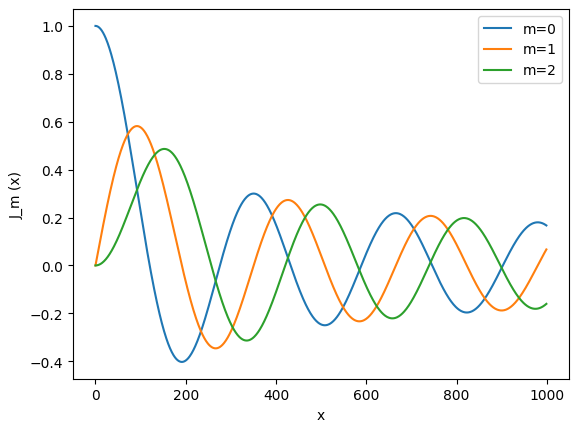

In [ ]:
#Ahora hacemos la gráfica de funciones de Bessel para J_0, J_1 y J_2
x = np.linspace(0,20,1000)
for m in range(0,3):
  plot( J(m,x), label='m='+str(m))
  xlabel('x')
  ylabel('J_m (x)')
  legend()

[[[1.05388285e-04 1.02602285e-04 9.91242288e-05 ... 9.91242288e-05
   1.02602285e-04 1.05388285e-04]
  [1.02602285e-04 9.90983949e-05 9.49436218e-05 ... 9.49436218e-05
   9.90983949e-05 1.02602285e-04]
  [9.91242288e-05 9.49436218e-05 9.01639757e-05 ... 9.01639757e-05
   9.49436218e-05 9.91242288e-05]
  ...
  [9.91242288e-05 9.49436218e-05 9.01639757e-05 ... 9.01639757e-05
   9.49436218e-05 9.91242288e-05]
  [1.02602285e-04 9.90983949e-05 9.49436218e-05 ... 9.49436218e-05
   9.90983949e-05 1.02602285e-04]
  [1.05388285e-04 1.02602285e-04 9.91242288e-05 ... 9.91242288e-05
   1.02602285e-04 1.05388285e-04]]

 [[1.05505286e-04 1.02749698e-04 9.93016823e-05 ... 9.93016823e-05
   1.02749698e-04 1.05505286e-04]
  [1.02749698e-04 9.92760495e-05 9.51505947e-05 ... 9.51505947e-05
   9.92760495e-05 1.02749698e-04]
  [9.93016823e-05 9.51505947e-05 9.03989728e-05 ... 9.03989728e-05
   9.51505947e-05 9.93016823e-05]
  ...
  [9.93016823e-05 9.51505947e-05 9.03989728e-05 ... 9.03989728e-05
   9.51505

TypeError: ignored

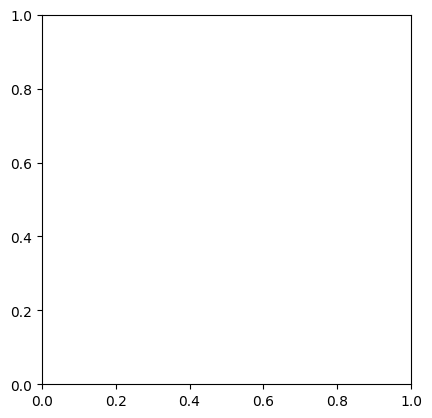

In [ ]:
#Ahora hacemos el diagrama de intensidad

#Definimos nuestros parametros:

#Si r es la distancia en el plano focal desde el centro del patrón de difracción, lo escribimos como el radio
x,y = mgrid[-1:1:300j,-1:1:300j]
r = sqrt(x**2 + y**2)
l =0.5
k = (2*np.pi)/l
c=k*r
#Ahora definimos la funcion intensidad en funcion de r
i_r = (J(1,c) / (k*r))**2
print(i_r)
gray()
imshow(i_r,vmax=0.5, extent=[-1,1,-1,1])


3. **Constante de Stefan-Boltzmann**

*Solucion de (a)*

In [ ]:
# Ya hemos definido el método de Simpson y trapecio, así que ahora definimos el metodo de Romberg

def Romberg(f,a,b,epsilon=1e-6):
  I = (b-a)/2*(f(b)+f(a))
  eps=1
  N=1
  R=zeros((100,100))
  R[0,0]=1
  i=0
  while eps>epsilon:
      N*=2
      i+=1
      R[i,0] = R[i-1,0]/2 + trapecio(f,a,b,N)
      for m in range(i):
         R[i,m+1] = R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
         eps = abs(R[i,m+1]-R[i-1,m])
  I = R[i,m+1]
  return I


Como la integral va de 0 a $\infty$, hacemos un cambio de variable, el cual es: $$ x = \frac{u}{1-u}  $$

Veamos que si $x → 0$, entonces; $u → 0$.

Por otro lado, si $x → ∞$, entonces; $1-u → 0$, por lo que $u → 1$.

Estos son nuestros nuevos límites de integración.

Con este cambio de variable, nuestra nueva función a integrar es:
$$ \left(\frac{u^3}{(1-u)^5}\right) \frac{1}{e^{\left(\frac{u}{1-u} \right)}-1} $$

Pues $$ dx = \frac{1}{(1-u)^2} du$$

In [ ]:
#Definimos las constantes
c = 3*(10**8) #velocidad de la luz
h=1.054571817*(10**(-34)) #h barra
k_b = 1.380649*(10**(-23)) #cte. de boltzman

#Definimos las diferentes temperaturas en K:
T1 = 50
T2 = 100
T3 = 200
T4 = 300

#Definimos nuestra constante
const = ((k_b)**4)/(4*(pi**2)*(c**2)*(h**3))

#Definimos nuestra función a integrar

def Func_a_Integrar(u):
  return (u**3)/( ((1-u)**5) * ( exp(u/(1-u)) -1)  )

#Ahora calculamos nuestra integral por diversos métodos:
Integ_trapecio1 = trapecio(Func_a_Integrar,0.01111,0.99999,100)
Integ_Simpson1 = Inte_Simpson(Func_a_Integrar,0.01111,0.99999,100)
#Integ_Romberg1 = Romberg(Func_a_Integrar,0.0,0.99999,epsilon=1e-6)

#Para T=50, tenemos:
W1 = const*(T1**4)*Integ_trapecio1
W2 = const*(T1**4)*Integ_Simpson1
#W3 = const*((T1)**4)*Integ_Romberg1

#Para T=100:
W4 = const*(T2**4)*Integ_trapecio1
W5 = const*(T2**4)*Integ_Simpson1
#W6 = const*((T2)**4)*Integ_Romberg1

#Para T=200:
W7 = const*(T3**4)*Integ_trapecio1
W8 = const*(T3**4)*Integ_Simpson1
#W9 = const*((T3)**4)*Integ_Romberg1

#Para T=300
W10 = const*(T4**4)*Integ_trapecio1
W11 = const*(T4**4)*Integ_Simpson1
#W12 = const*((T4)**4)*Integ_Romberg1

<ipython-input-7-a7e399b44365>:18: RuntimeWarning: overflow encountered in exp
  return (u**3)/( ((1-u)**5) * ( exp(u/(1-u)) -1)  )


In [ ]:
#Nuestros resultados son:
#Observacion: no corremos el de Romberg, porque tarda demasiado en correr
print('Para T=50:')
print('Trapecio: W=',W1)
print('Simpson: W=',W2)

Para T=50:
Trapecio: W= 0.35390818501280746
Simpson: W= 0.35390823822123163


In [ ]:
print('para T=100:')
print('trapecio: W=', W4)
print('Simpson: W=',W5)

para T=100:
trapecio: W= 5.662530960204919
Simpson: W= 5.662531811539706


In [ ]:
print('Para T=200:')
print('trapecio: W=', W7)
print('Simpson: W=', W8)

Para T=200:
trapecio: W= 90.60049536327871
Simpson: W= 90.6005089846353


In [ ]:
print('Para T=300:')
print('trapecio: W=', W10)
print('Simpson: W=', W11)

Para T=300:
trapecio: W= 458.6650077765985
Simpson: W= 458.66507673471614


Text(0, 0.5, 'T')

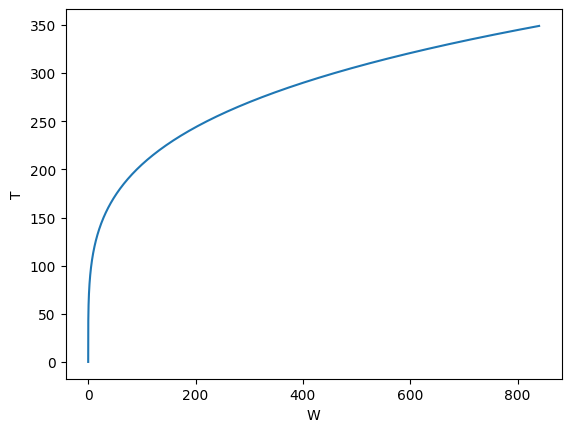

In [ ]:
#Podemos corroborar estos resultados en una grafica:
Temp = range(0,350,1) #Establemeos un rango de temperatura de 0 a 350, pues ahí se encuentran los valores que nos interesan
Tra = [] #Abrimos una lista para los valores usando el método de trapecio
for i in Temp:
  T=i #Queremos que nuestra temperatura varie en ese rango
  cont1 = ((k_b*T)**4)/(4*(pi**2)*(c**2)*(h**3)) #establecemos nuestra constante
  Tra.append(cont1*Integ_trapecio1) #creamos la lista con los valores de W, así que ponemos el producto de nuestra constante con lo que se obtuvo de la integral usando el método dle trapecio

plot(Tra,Temp)
xlabel('W')
ylabel('T')

Observemos que nuestros valores obtenidos para W si se encuentran en esta curva, por lo que asumiremos que están bien.

Por otro lado, observemos que nuestros resultados de W no difieren mucho entre los métodos. La diferencia radica en varia cifras despues del punto decimal.

*Solucion de (b):*

Con $W= σ T^4$, podemos igualar $\sigma T^4$ con la W que conocemos:

$$ \sigma T^4 = \frac{(k_B)^4 T^4}{4\pi^2c^2 ħ^3} \int_{0}^{∞} \frac{x^3}{e^x -1} dx$$

Si quitamos a $T^4$ de ambos lados de la igualdad, obtenemos a $\sigma$.

In [ ]:
#Ya definimos la constante que está fuera de la integral sin T^4 y ya tenemos la integral resuelta
#Por lo que solo sacamos el producto de ello para obtener a sigma (una para cada método)

sigma1 = const*Integ_trapecio1
sigma2 = const*Integ_Simpson1
print('el valor de la cte. de Stefan-Boltzman con el mét. del trapecio es:', sigma1)
print('el valor de la cte. de Stefan-Boltzman con Simpson es:',sigma2)


el valor de la cte. de Stefan-Boltzman con el mét. del trapecio es: 5.66253096020492e-08
el valor de la cte. de Stefan-Boltzman con Simpson es: 5.662531811539706e-08


Observemos que el valor esperado es $\sigma ≈ 5.67e-8$, y dado que lo que obtuvimos es aproximado a nuestro resultado, podemos decir que la integral está bien resuelta.

4. **Principio de Incertidumbre del oscilador armónico**

*Solución (a):*

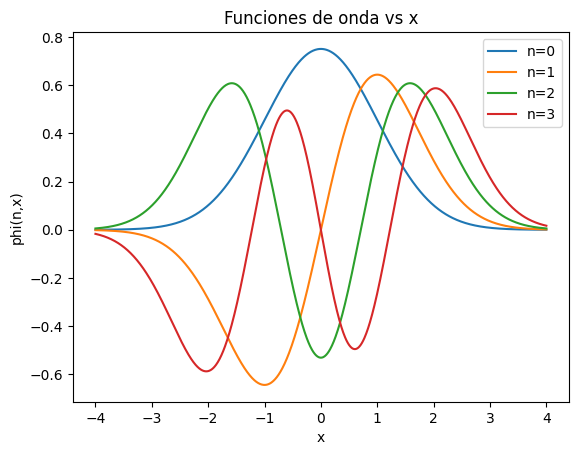

In [ ]:
#Definimos a nuestra funcion H con los datos que tenemos:
def H(n,x):
   if n==0:
      return 1
   elif n==1:
      return 2*x
   else:
      return 2*x*H(n-1,x) - 2*(n-1)*H(n-2,x)

#ahora definimos a las funciones de onda
def phi(n,x):
   return (1/sqrt(2**n *factorial(n) *sqrt(pi))) * (e**(-x**2/2))*H(n,x)

#Hacemos nuestro diagrama
x = np.linspace(-4,4,1000)
for n in range(0,4):
   plot(x,phi(n,x), label=f'n={n}')
   xlabel('x')
   ylabel('phi(n,x)')
   title('Funciones de onda vs x')
   legend()

*Solucion (b):*

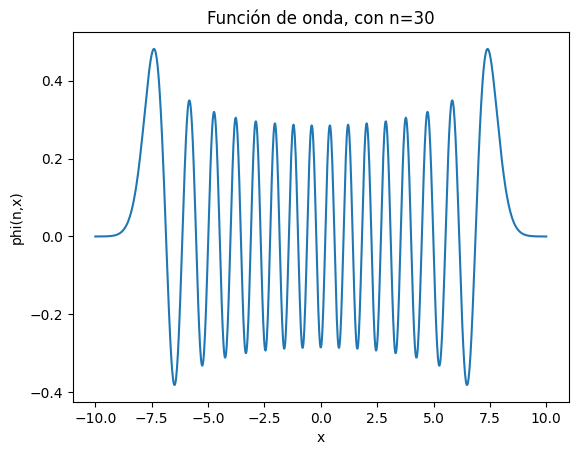

In [ ]:
#Como ya tenemos a H(n,x) y phi(n,x) definidas, definimos x y phi con n=30
x =np.linspace(-10,10,1000)
phi_b = phi(30,x)

#Ahora hacemos el diagrama
plot (x,phi_b)
xlabel('x')
ylabel('phi(n,x)')
title('Función de onda, con n=30')
show()